In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("Lagomorpha_out_iqtree_v2_HKY_G5.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n89          1.7105 ( 1.5892,  1.9541) ( 1.5642,  1.9026)  0.3384 (Jnode 174)\n',
 't_n90          0.4843 ( 0.4695,  0.4994) ( 0.4692,  0.4990)  0.0298 (Jnode 173)\n',
 't_n91          0.3257 ( 0.2936,  0.3550) ( 0.2954,  0.3561)  0.0607 (Jnode 172)\n',
 't_n92          0.3203 ( 0.2880,  0.3497) ( 0.2904,  0.3519)  0.0615 (Jnode 171)\n',
 't_n93          0.3133 ( 0.2798,  0.3432) ( 0.2820,  0.3445)  0.0626 (Jnode 170)\n',
 't_n94          0.2487 ( 0.2140,  0.2793) ( 0.2164,  0.2807)  0.0644 (Jnode 169)\n',
 't_n95          0.1443 ( 0.1164,  0.1690) ( 0.1166,  0.1691)  0.0525 (Jnode 168)\n',
 't_n96          0.1338 ( 0.1076,  0.1582) ( 0.1090,  0.1595)  0.0505 (Jnode 167)\n',
 't_n97          0.0485 ( 0.0293,  0.0718) ( 0.0280,  0.0700)  0.0420 (Jnode 166)\n',
 't_n98          0.1220 ( 0.0972,  0.1452) ( 0.0962,  0.1438)  0.0476 (Jnode 165)\n',
 't_n99          0.1139 ( 0.0903,  0.1370) ( 0.0893,  0.1357)  0.0464 (Jnode 164)\n',
 't_n100         0.1015 ( 0.0799,  0.1233) ( 0.0792,  

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
    lower_ci_iqtree.append(float(line[3][:-1]))
    upper_ci_iqtree.append(float(line[4][:-1]))
    # posterior_mean_baseml.append(float(line[4]))
    # lower_ci_baseml.append(float(line[5]))
    # upper_ci_baseml.append(float(line[6]))
    
for line in mu_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_iqtree.append(float(line[1]))
    lower_ci_mu_iqtree.append(float(line[3][:-1]))
    upper_ci_mu_iqtree.append(float(line[4][:-1]))
    
for line in var_data:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_var_iqtree.append(float(line[1]))
    lower_ci_var_iqtree.append(float(line[3][:-1]))
    upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',
 't_n100',
 't_n101',
 't_n102',
 't_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107',
 't_n108',
 't_n109',
 't_n110',
 't_n111',
 't_n112',
 't_n113',
 't_n114',
 't_n115',
 't_n116',
 't_n117',
 't_n118',
 't_n119',
 't_n120',
 't_n121',
 't_n122',
 't_n123',
 't_n124',
 't_n125',
 't_n126',
 't_n127',
 't_n128',
 't_n129',
 't_n130',
 't_n131',
 't_n132',
 't_n133',
 't_n134',
 't_n135',
 't_n136',
 't_n137',
 't_n138',
 't_n139',
 't_n140',
 't_n141',
 't_n142',
 't_n143',
 't_n144',
 't_n145',
 't_n146',
 't_n147',
 't_n148',
 't_n149',
 't_n150',
 't_n151',
 't_n152',
 't_n153',
 't_n154',
 't_n155',
 't_n156',
 't_n157',
 't_n158',
 't_n159',
 't_n160',
 't_n161',
 't_n162',
 't_n163',
 't_n164',
 't_n165',
 't_n166',
 't_n167',
 't_n168',
 't_n169',
 't_n170',
 't_n171',
 't_n172',
 't_n173',
 't_n174',
 't_n175']

In [6]:
posterior_mean_iqtree

[1.7105,
 0.4843,
 0.3257,
 0.3203,
 0.3133,
 0.2487,
 0.1443,
 0.1338,
 0.0485,
 0.122,
 0.1139,
 0.1015,
 0.0804,
 0.0245,
 0.0186,
 0.0103,
 0.0063,
 0.0034,
 0.0196,
 0.0647,
 0.114,
 0.0974,
 0.0905,
 0.0514,
 0.0402,
 0.0313,
 0.0156,
 0.0045,
 0.0044,
 0.0101,
 0.0091,
 0.0081,
 0.0076,
 0.0363,
 0.0642,
 0.1348,
 0.1253,
 0.0044,
 0.1047,
 0.0277,
 0.0503,
 0.0965,
 0.3022,
 0.2714,
 0.2795,
 0.2532,
 0.1314,
 0.2934,
 0.1352,
 0.0944,
 0.0653,
 0.1191,
 0.1685,
 0.164,
 0.1347,
 0.1261,
 0.0718,
 0.0595,
 0.0547,
 0.0438,
 0.012,
 0.0101,
 0.0088,
 0.0129,
 0.0171,
 0.0015,
 0.0088,
 0.1237,
 0.0922,
 0.0695,
 0.0611,
 0.0556,
 0.0428,
 0.0198,
 0.0503,
 0.0829,
 0.1302,
 0.1137,
 0.0705,
 0.0606,
 0.0069,
 0.0293,
 0.036,
 0.015,
 0.0964,
 0.1588,
 0.03]

In [7]:
lower_ci_iqtree

[1.5892,
 0.4695,
 0.2936,
 0.288,
 0.2798,
 0.214,
 0.1164,
 0.1076,
 0.0293,
 0.0972,
 0.0903,
 0.0799,
 0.0628,
 0.0154,
 0.011,
 0.0056,
 0.0014,
 0.0009,
 0.0113,
 0.0414,
 0.0899,
 0.0761,
 0.0695,
 0.0375,
 0.0289,
 0.0221,
 0.0087,
 0.0026,
 0.0001,
 0.0063,
 0.0057,
 0.005,
 0.0046,
 0.024,
 0.0452,
 0.1022,
 0.0933,
 0.0006,
 0.0747,
 0.0151,
 0.0302,
 0.0307,
 0.2673,
 0.2273,
 0.2357,
 0.1992,
 0.0749,
 0.2524,
 0.0986,
 0.065,
 0.0417,
 0.0534,
 0.1372,
 0.134,
 0.1094,
 0.1012,
 0.0541,
 0.0447,
 0.0408,
 0.0317,
 0.0073,
 0.006,
 0.0051,
 0.0076,
 0.0098,
 0.0003,
 0.004,
 0.0983,
 0.0716,
 0.0518,
 0.045,
 0.0402,
 0.0294,
 0.0112,
 0.0345,
 0.0629,
 0.1019,
 0.0861,
 0.0466,
 0.0382,
 0.0021,
 0.0142,
 0.0209,
 0.0066,
 0.0698,
 0.1241,
 0.0178]

In [8]:
upper_ci_iqtree

[1.9541,
 0.4994,
 0.355,
 0.3497,
 0.3432,
 0.2793,
 0.169,
 0.1582,
 0.0718,
 0.1452,
 0.137,
 0.1233,
 0.0991,
 0.0367,
 0.0285,
 0.0172,
 0.0125,
 0.0075,
 0.0305,
 0.0895,
 0.1363,
 0.1184,
 0.1117,
 0.069,
 0.0554,
 0.0442,
 0.0249,
 0.0073,
 0.0153,
 0.0163,
 0.0148,
 0.0132,
 0.0125,
 0.0514,
 0.0856,
 0.1646,
 0.1552,
 0.0122,
 0.1346,
 0.0461,
 0.0748,
 0.1451,
 0.3339,
 0.3097,
 0.3184,
 0.2995,
 0.1931,
 0.3294,
 0.1756,
 0.1298,
 0.0956,
 0.1912,
 0.2057,
 0.1996,
 0.1641,
 0.1553,
 0.0943,
 0.0791,
 0.0729,
 0.0596,
 0.0193,
 0.0163,
 0.014,
 0.0204,
 0.0266,
 0.0035,
 0.0164,
 0.1534,
 0.1179,
 0.0916,
 0.0805,
 0.0743,
 0.0595,
 0.0314,
 0.0693,
 0.1079,
 0.1622,
 0.1457,
 0.0991,
 0.0882,
 0.0152,
 0.0526,
 0.0571,
 0.0278,
 0.1271,
 0.1955,
 0.0514]

In [9]:
file_mcmctree = open("Lagomotpha_out_baseml_HKY_G5.txt", "r")
lines1 = file_mcmctree.readlines()
file_mcmctree.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
    lower_ci_baseml.append(float(line[3][:-1]))
    upper_ci_baseml.append(float(line[4][:-1]))
    
for line in mu_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_mu_baseml.append(float(line[1]))
    lower_ci_mu_baseml.append(float(line[3][:-1]))
    upper_ci_mu_baseml.append(float(line[4][:-1]))
    
for line in var_data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_var_baseml.append(float(line[1]))
    lower_ci_var_baseml.append(float(line[3][:-1]))
    upper_ci_var_baseml.append(float(line[4][:-1]))

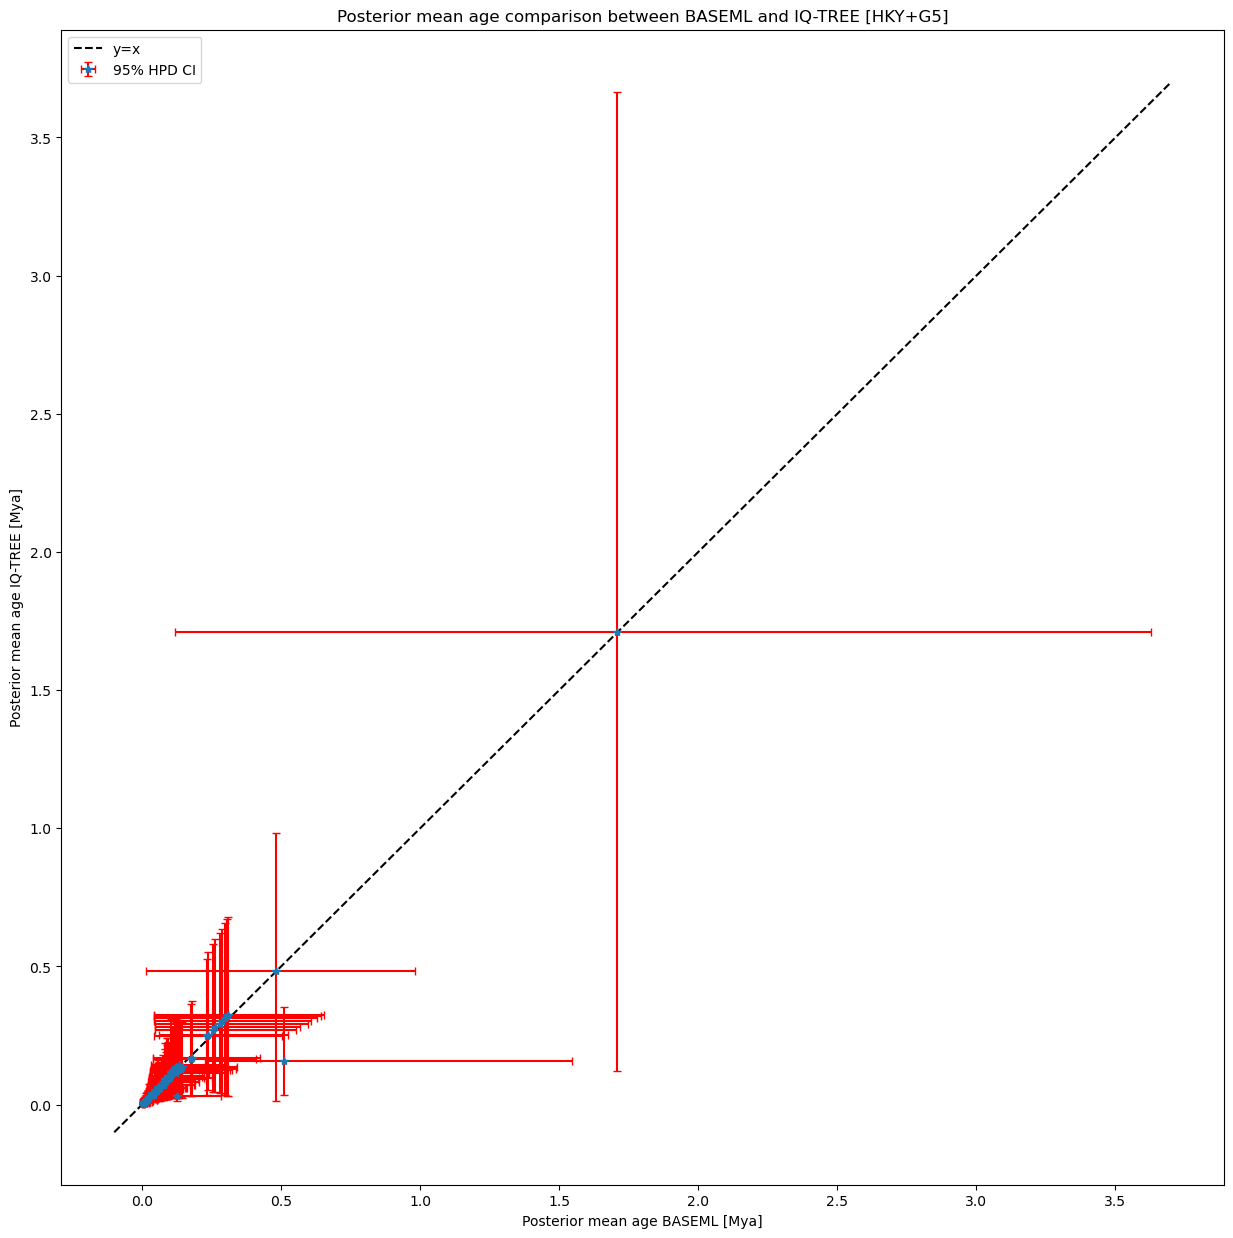

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 15))
ax.plot([-0.1,3.7], 
        [-0.1, 3.7], 
        'k--', label='y=x')
ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
            xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')

# Labels and title
ax.set_xlabel('Posterior mean age BASEML [Mya]')
ax.set_ylabel('Posterior mean age IQ-TREE [Mya]')
ax.set_title('Posterior mean age comparison between BASEML and IQ-TREE [HKY+G5]')
ax.legend()

# Show plot
# plt.show()
plt.savefig('./Lagomorpha_posterior_mean_age_comparison_HKY_G5_v2.png')

In [11]:
posterior_mean_baseml

[1.7092,
 0.4834,
 0.3107,
 0.3049,
 0.2976,
 0.2341,
 0.1339,
 0.1241,
 0.045,
 0.1131,
 0.1061,
 0.0942,
 0.0746,
 0.0244,
 0.0184,
 0.0101,
 0.0061,
 0.0033,
 0.0197,
 0.0602,
 0.1058,
 0.0905,
 0.0842,
 0.0476,
 0.0374,
 0.0292,
 0.0148,
 0.0042,
 0.0043,
 0.0091,
 0.0083,
 0.0073,
 0.0069,
 0.034,
 0.059,
 0.1203,
 0.1122,
 0.0038,
 0.0936,
 0.0254,
 0.0451,
 0.0883,
 0.2857,
 0.2561,
 0.2637,
 0.2377,
 0.1193,
 0.2787,
 0.1205,
 0.0838,
 0.0581,
 0.1058,
 0.1802,
 0.175,
 0.142,
 0.1336,
 0.0777,
 0.0655,
 0.06,
 0.0479,
 0.0134,
 0.0113,
 0.0097,
 0.0141,
 0.0195,
 0.0017,
 0.0127,
 0.1309,
 0.0945,
 0.0717,
 0.0633,
 0.0575,
 0.0445,
 0.0206,
 0.0522,
 0.0845,
 0.1403,
 0.1228,
 0.0747,
 0.0641,
 0.0073,
 0.0342,
 0.0418,
 0.0176,
 0.1022,
 0.5106,
 0.1245]

In [12]:
posterior_mean_iqtree

[1.7105,
 0.4843,
 0.3257,
 0.3203,
 0.3133,
 0.2487,
 0.1443,
 0.1338,
 0.0485,
 0.122,
 0.1139,
 0.1015,
 0.0804,
 0.0245,
 0.0186,
 0.0103,
 0.0063,
 0.0034,
 0.0196,
 0.0647,
 0.114,
 0.0974,
 0.0905,
 0.0514,
 0.0402,
 0.0313,
 0.0156,
 0.0045,
 0.0044,
 0.0101,
 0.0091,
 0.0081,
 0.0076,
 0.0363,
 0.0642,
 0.1348,
 0.1253,
 0.0044,
 0.1047,
 0.0277,
 0.0503,
 0.0965,
 0.3022,
 0.2714,
 0.2795,
 0.2532,
 0.1314,
 0.2934,
 0.1352,
 0.0944,
 0.0653,
 0.1191,
 0.1685,
 0.164,
 0.1347,
 0.1261,
 0.0718,
 0.0595,
 0.0547,
 0.0438,
 0.012,
 0.0101,
 0.0088,
 0.0129,
 0.0171,
 0.0015,
 0.0088,
 0.1237,
 0.0922,
 0.0695,
 0.0611,
 0.0556,
 0.0428,
 0.0198,
 0.0503,
 0.0829,
 0.1302,
 0.1137,
 0.0705,
 0.0606,
 0.0069,
 0.0293,
 0.036,
 0.015,
 0.0964,
 0.1588,
 0.03]

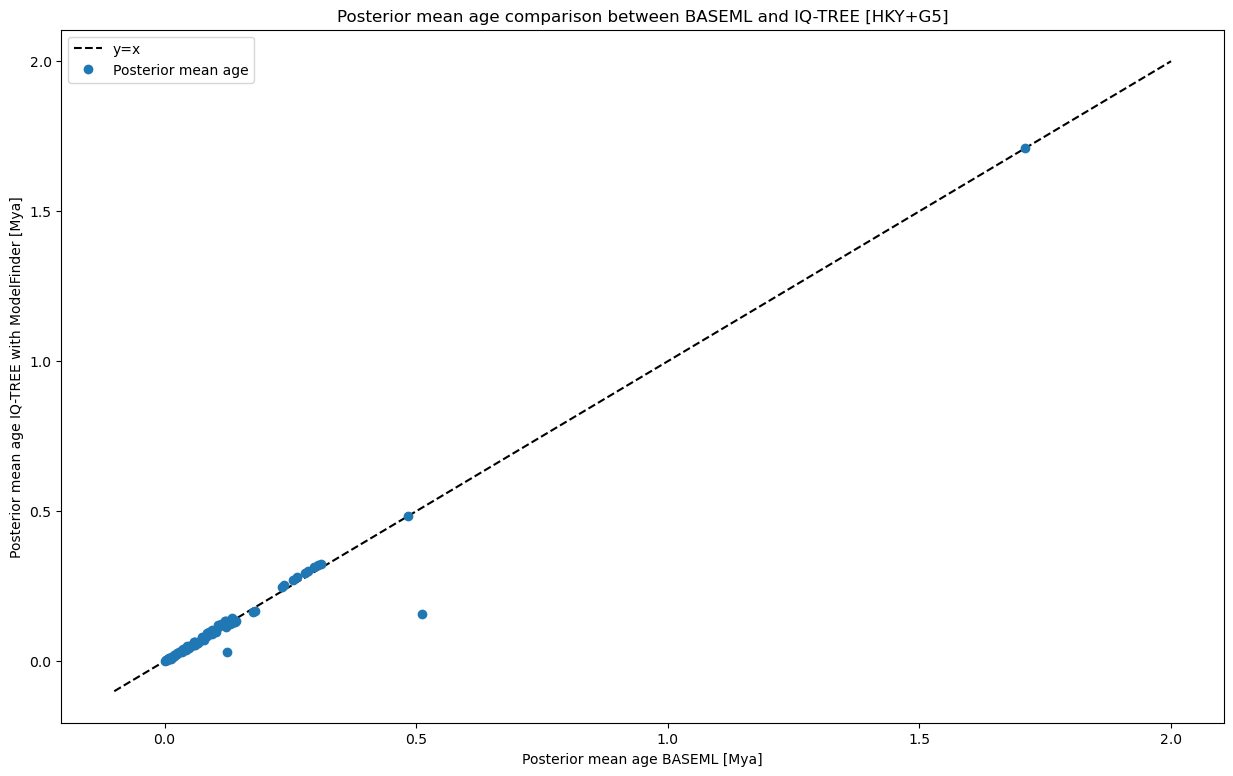

In [13]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 9))
ax.plot([-0.1,2.0], 
        [-0.1, 2.0], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age BASEML [Mya]')
ax.set_ylabel('Posterior mean age IQ-TREE with ModelFinder [Mya]')
ax.set_title('Posterior mean age comparison between BASEML and IQ-TREE [HKY+G5]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./Lagomorpha_posterior_mean_age_comparison_HKY_G5_scatter_v2.png')